In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_01 import *
css_styling()

# Rapportering af resultater

# Reporting results

## Formål

- At kunne gengive resultater med tilstrækkelig men ikke overdreven præcision 
- At metodisk kunne afrunde resultater på en ikke-skævvredet måde 
- At kunne gengive resultater med usikkerheder på en systematisk måde

## Purpose

- To be able to report results with sufficient but not excessive precision
- To methodically round off results in a non-biases way
- To be able to report results with uncertainties in systematic way

Som vi så tidligere, så vil vi _altid_ rapporter et resultat med en vedhæftet usikkerhed 

$$x \pm \delta_x\quad.$$

Men hvorledes giver disse værdier, specielt med hvor mange cifre, skal vi også overveje.  Men før vi dykker ned i det skal vi først snakke om antallet af _betydende cifre_ (engl. [significant digits](https://en.wikipedia.org/wiki/Significant_figures)). 

As we saw earlier, we will _always_ report a result with an attached uncertainty

$$x \pm \delta_x\quad.$$

However, we must also consider how to report these values, especially with how many digits. But before we dive into it, we first talk about the number of [_significant digits_](https://en.wikipedia.org/wiki/Significant_figures).

## Betydende cifre 

Vi tæller antallet af betydende cifre for et givet tal $x$ ved 

- først fjerne alle foran-stillet $0$'er, inklusiv nuller efter decimal separatoren (`,` på dansk, `.` på engelsk)  
- Hvis tallet _ikke_ indeholder en decimal-separator (`.` eller `,`) fjernes alle bagved-stillet nuller 
- Hvis tallet _indeholder_ en decimal-separator (`.` eller `,`) fjerenes ingen bagved-stillet $0$'er 

Lad os i det følgende bruge den engelske konvention og lade `.` betegne decimal-separatoren.  Det skal dog ikke tages som en opfording til at bruge `.` i danske tekster - der bør man såvidt muligt bruge `,`.  

## Significant digits

We count the number of significant digits for a given number of $x$ by

- first remove all leading $0$s, including zeros after decimal separator `.`.
- If the number _does not_ contain a decimal separator (`.`) then _all_ trailing zeros are removed
- If the number _does_ contains a decimal separator (`.`) then _no_ trailing zeros are removed

### Eksempel: Antal betydende cifre

Lad os tage nogle eksempler 

- $1234567$ har 7 betydende cifre 
- $0123456$ har 6 betydende cifre da det første $0$ ikke tæller 
- $1234000$ har 4 betydende cifre da de bagved-stillet nuller ikke tæller og tallet ikke indeholder `.`
- $0.00123$ har 3 betydende cifre da _ingen_ af de foran-stillet nuller tæller 
- $0.01200$ har 4 betydende cifre da de sidste $0$'er tæller 

### Example: Number of significant digits

Let's take some examples

- $1234567$ has 7 significant digits
- $0123456$ has 6 significant digits since the first $0$ does not count
- $1234000$ has 4 significant digits, since the number does not contain a decimal point and the trailing zeros do not count
- $0.00123$ has 3 significant digits since _none_ of the given zeros counts
- $0.01200$ has 4 significant digits as the last $0$'s do count

### Eksempel: Tælle betydende cifre

Lad os lave en funktion der tæller antallet af betydende cifre 

### Example: Counting significant digits

Let us make a function that counts the number of significant digits

In [3]:
def n_significant(num_or_string):
    s = str(num_or_string)
    try:
        float(s)
    except:
        raise ValueError(f"{num_or_stringg} not decimal")
    s = s.lstrip("0.")
    if "." not in s:
        s.rstrip("0")
    return len(s)

Lad os bruge denne funktion på nogle tal.  Bemærk at talværdier som `0123` ikke er gyldige i Python, ligesom at Python fjerner bagved-stillet nuller i f.eks. `0.01200`, hvorfor vi vil skrive disse som strenge. 

We will use this function on some numbers. Note that numerical values like `0123` are not valid in Python, just as Python removes zeros on for example `0.01200`, so we will write these as kind of numbers as strings.

In [4]:
for i in (12345, 12340, "012345", 0.00123, "0.01200"):
    print(f"{str(i):20} -> {n_significant(i):2} significant digits")

12345                ->  5 significant digits
12340                ->  5 significant digits
012345               ->  5 significant digits
0.00123              ->  3 significant digits
0.01200              ->  4 significant digits


## Intermezzo - hvor mange betydende cifre 

I vores diskussion af _nøjagtighed_ og _præcision_ ovenover, kom vi ind på at usikkerheden fortæller os hvor _præcist_ vi har bestemt en værdi.   Derfor er det _usikkerhedens_ værdi der bestemmer hvor mange betydende cifre vi skal give vores resultat med.  Som det også er klart fra diskussionen omkring præcision, kan vi ikke give vilkårlig mange betydende cifre på vores usikkerhed.  Vi kan f.eks. have beregnet at 

## Intermezzo - how many significant digits

In our discussion of _accuracy_ and _precision_ above, we seen that the uncertainty tells us how _precisely_ we determined value. Therefore, the value of the _uncertainty_ determines how many significant digits we should give our result with. As is also clear from the discussion on precision, we cannot give arbitrary many significant digits on our uncertainty. For example, we may have calculated that

$$\delta_X = 0.5136\ldots\quad,$$ 

ved brug af vores analyse værktøjer.  Det er dog ikke rimeligt at sige at vi kender vores usikkerhed med så stor (4 betydende cifre) præcision eller nøjagtighed.  Derfor vil vi insisterer på at give usikkerheden med maksimalt én eller to betydende cifre, hvor vi dog skal have _særlig gode_ grunde for at give to betydende cifre.  

Vi vil altså give usikkerheden ovenover som 

using our analysis tools. However, it is not reasonable to say that we know our uncertainty with such a large (4 significant digits) precision or accuracy. Therefore, we will insist on giving the uncertainty with a maximum of one or two significant digits. However we must have _particularly good_ reasons for giving two significant digits.

We will therefore give the uncertainty above as

$$\delta_X = 0.5\quad.$$ 

Så langt så godt.  Vi giver vores usikkerhed med én betydende cifer.  Hvorledes skal vi så give vores resultat? Her applerer vi igen til diskussionen vedrørende præcision og nøjagtighed: Usikkerheden reflekterer hvor _præcist_ vi har bestemt værdien, så vi kan ikke med rimelighed give resultat værdien med større præcision end den vi giver usikkerheden med. 

Som eksempel kan vi forestille os at vi har beregnet 

So far so good. We give our uncertainty with one significant digit. So how do we quote the value of our result? Here we again appeal to the discussion regarding precision and accuracy: The uncertainty reflects how _precisely_ we have determined the value, so we cannot reasonably give the value of the result with greater precision than uncertainty.

For example, we can imagine that we have calculated

$$X = 12.3231\ldots\quad,$$

ved brug af vores analyse værktøjer, og at vi har fundet at usikkerheden er $\delta_X=0.5$.  Da præcisionen af usikkerheden er $10^{-1}$ kan vi ikke give værdien af $X$ med større præcision en $10^{-1}$, og vi vil sige 

using our analysis tools and that we have found that the uncertainty is $\delta_X=0.5$. Since the precision of the uncertainty is $10^{-1}$, we cannot give the value of $X$ with greater precision than $10^{-1}$ and we will report

$$X = 12.3$$

### Eksempel: Antal betydende cifre på fejl

Lad os trække en række tilfældige tal, og besteme middel værdien og usikkerheden på denne. 

### Example: Number of significant digits of error

Let us draw some random numbers and determine the mean value and the uncertainty on these.

In [5]:
from numpy.random import normal 
from numpy import sqrt

x = normal(0,1,1000)
print(f"Mean: {x.mean():16.11f}  Uncertainty: {x.std()/sqrt(len(x)):16.11f}")

Mean:   -0.07452796589  Uncertainty:    0.03238201655


Python vil typiske give os resultaterne med mere end 10 cifre efter `.`.  Det er klart nok langt uden for vores præcision.  En måde at se det på er ved at gentage eksperimentet flere gange - her 10 gange

Python will typically give us the results with more than 10 digits after `.`. That is clearly far beyond our precision. A way to see this is by repeating the experiment several times - here 10 times

In [6]:
x = normal(0,1,size=(10,1000))

for m,s in zip(x.mean(axis=1),x.std(axis=1)):
    print(f"Mean: {m:16.13f}\tUncertainty: {s/sqrt(x.shape[1]):16.13f}")

Mean: -0.0171283925030	Uncertainty:  0.0312310240248
Mean:  0.0655351662947	Uncertainty:  0.0314263257228
Mean: -0.0381872433914	Uncertainty:  0.0315201751456
Mean:  0.0417656685002	Uncertainty:  0.0329097398555
Mean: -0.0143284998052	Uncertainty:  0.0310897220521
Mean:  0.0101184539013	Uncertainty:  0.0330329826692
Mean: -0.0132606533228	Uncertainty:  0.0316591336368
Mean:  0.0376319384393	Uncertainty:  0.0313441723147
Mean: -0.0016854428681	Uncertainty:  0.0317417108532
Mean:  0.0432909841620	Uncertainty:  0.0322895674904


Typisk ser vi at usikkerheden varier allerede på det andet betydende cifer.  En kørsel af det ovenstående gav 

Typically, we see that the uncertainty varies already on the second significant digit. A run of the above gave

    Mean: -0.0422...  Uncertainty: 0.0319...
    Mean: -0.0095...  Uncertainty: 0.0304...
    Mean:  0.0128...  Uncertainty: 0.0306...
    Mean:  0.0284...  Uncertainty: 0.0304...
    Mean: -0.0428...  Uncertainty: 0.0311...
    Mean:  0.0524...  Uncertainty: 0.0310...
    Mean: -0.0412...  Uncertainty: 0.0306...
    Mean:  0.0125...  Uncertainty: 0.0323...
    Mean:  0.0042...  Uncertainty: 0.0302...
    Mean:  0.0061...  Uncertainty: 0.0317...

hvor en del cifre er erstattet med `...`.

Hvis vi tager den første af disse vil vi skrive 

where some digits are replaced by `...`.

If we take the first of these we will write

$$X = -0.04\quad \delta_X = 0.03\quad,$$ 

mens hvis vi tager det sidste vil vi skrive 

while choosing the last, we would write

$$X = 0.01\quad \delta_X = 0.03\quad.$$ 

Bemærk at disse resultater (og alle andre ovenover) er i ovensstemmelse i det de stemmer overens indenfor deres usikkerheder.  Bemærk også at værdien af $X$ (gennemsnittet) svinger meget, men at usikkerheden er mere eller mindre konstant. 

Note that these results (and all of the above) are in agreement within uncertainties. Also note that the value of $X$ (the mean) fluctuates a lot, but the uncertainty is more or less constant.

## Afrunding 

Lad os sige vi har beregenet 

## Rounding

Let us say we got the result

$$X = 1.29\!\ldots\quad,$$

som vi skal rapporterer til en præcision af $10^{-1}$ (eller med to betydende cifre).  Det vil være urimeligt at give værdien $X=1.2$, da $1.29\!\ldots$ trods alt er tættere på $1.3$ end $1.2$.  Tilsvarende, hvis vi har beregnet 

which we will report to a precision of $10^{-1}$ (or with two significant digits). It will be unreasonable to give the value $X=1.2$ since $1.29\!\ldots$ is after all closer to $1.3$ than $1.2$. Similarly, if we have calculated

$$X = 1.23\!\ldots\quad,$$

vil vi give $X=1.2$ da det er tættere end $1.3$.  Vi vil derfor altid [_runde af_](https://en.wikipedia.org/wiki/Rounding) (i modsætning til at _runde op_ eller _runde ned_).   Normalt har vi lært at runde af med reglen

- Hvis det cifer der følger efter det cifer vi vil afrunde er 5 eller større, så ligger vi én til det cifer vi vil afrunde.
- Hvis det efterfølgende cifer efter det cifer vi afrunder er mindre end 5, så gør vi intet. 

Vi vil i det store hele følge denne konvention, men dog modificerer den en smule - særligt i det tilfælde at det cifer der følger efter cifret vi afrunder er 5. 

Vores modifikation baserer sig løst på følgende argument: 

- Lad os sige vi har en lang række reelle tal som vi ønsker at afrunde til heltal, og at deres decimal del $f$ (det der følger efter `.`) er fladt fordelt over $[0,1)$.  
- For en ethvert $f\neq0.5$ vil der være en komplimentær partner $1-f$ med lige stor sandsynlighed, hvorfor afrunding af disse to altid vil kompenserer hinanden sådan at gennemsnittet er bevaret. 
- Men, afrunder vi _altid_ tal med $f=0.5$ op, så kommer vi til at lave en skævvridning af fordelingen af talene således at gennemsnittet _ikke_ er bevaret. 

we will give $X=1.2$ as it is closer than $1.3$. We will therefore always [_round off_](https://en.wikipedia.org/wiki/Rounding) (as opposed to _round up_ or _round down_). Typically, we have learned to round off using the rules

- If the digit that follows the digit we want to round is 5 or greater then we add one to the digit we are rounding.
- If the digit after the digit we are rounding is less than 5, then we do nothing.

We will largely follow this convention, but modify it a bit - especially in the case that the digit following the digit we are rounding is 5.

Our modification is based solely on the following argument:

- Let's say we have a large number of real numbers that we want to round to integers, and that their decimal part $f$ (what follows `.`) is uniformly distributed over $[0,1)$.
- For any $f\neq0.5$, there will be a complementary partner $1-f$ with equal probability, so rounding off these two will always compensate each other so that the average is preserved.
- But, if we _always_ round numbers with $f=0.5$ up, then we introduce a bias on the distribution of the numbers so that the average _not_ is preserved.

### Eksempel: Folkeskole afrunding med og uden 0.5

Lad os se hvordan at runde 0.5 op til 1 i en række tilfældige tal påvirker vores gennemsnit.  Vi tager 100000 tilfældige heltal mellem 0 og 1000 og dividerer med 1000 for at få tilfældige tal med en præcision af $10^{-3}$.  Derefter undersøger vi alle tal.  Hvis tallet er mindre en 0.5 runder vi ned til 0 og ligger dette til begge vore lister `r` og `h`.  Ligeledes vis tallet er større en 0.5 runder vi op til 1 og ligger dette til vores lister `r` og `h`.  Men, hvis tallet er 0.5 runder vi det op til 1, og ligger det _kun_ til listen `h`.  Derefter beregner vi gennemsnittet over disse to lister `r` og `h` og kigger på disse. 

### Example: Primary school rounding with and without 0.5

Let us see how rounding 0.5 up to 1 in a number of random numbers affects our average. We take 100,000 random integers between 0 and 1000 and divide by 1000 to get random numbers with a precision of $10^{-3}$. Then we examine all numbers. If the number is less than 0.5 we round down to 0 for both our lists `r` and` h`. Likewise, if the number is larger than $0.5$ we round up to 1 and add this to our lists `r` and` h`. But if the number is `exactly` 0.5 we round it up to 1, and add it _only_ to the list `h`. Then we calculate the average of these two lists `r` and` h` and look at the results

In [7]:
from numpy.random import seed, randint 
from numpy import mean, arange

seed(1234567)
x = randint(0,1000,100000)/1000
r = []
h = []
for xx in x:
    if xx > 0.5:
        r.append(1)
        h.append(1)
    elif xx < 0.5:
        r.append(0)
        h.append(0)
    else:
        h.append(1)
print(f"# append samples without 0.5: {len(r)}, with 0.5: {len(h)}")
mr = mean(r)
mh = mean(h)
print(f"Mean without 0.5: {mr:.3f},  with 0.5: {mr:.3f} (raw: {x.mean():.3f})")

# append samples without 0.5: 99887, with 0.5: 100000
Mean without 0.5: 0.498,  with 0.5: 0.498 (raw: 0.499)


Vi ser at gennemsnittet over `r` - der hvor vi _ikke_ har lagt 0.5 til, altid er _mindre eller lig med_  gennemsnittet over `h`, hvilket betyder at der er slagside i `h` mod 1.  Testen skal dog kun tages som  _indikativ_ af problemet:  De præcise tal afhænger i høj grad af det (pseudo)tilfældige tal som computeren genererer for os. 

We see that the average over `r` - where we did _not_ add 0.5, is always _less than or equal to_ the average over` h`, which means that there is a _bias_ in `h` towards 1. However, the test should only be taken as _indicative_ of the problem: The exact numbers depend largely on the (pseudo) random numbers that the computer generates for us.

Vores regler bliver 

- Hvis det cifer der følger efter det cifer vi vil afrunde er større end 5, så ligger vi én til det cifer vi vil afrunde.
- Hvis det efterfølgende cifer efter det cifer vi afrunder er mindre end 5, så gør vi intet. 
- Hvis 5 følger det tal vi afrunder, og cifret _efter_ 5-tallet er _større_ end 0 ligger vi en til det cifer vi vil afrunde. 
- Hvis det cifer der følger efte det cifre vi vil afrunde er 5 _og_ det cifer der følger efter 5-tallet er 0, så rund vi cifret op til det _nærmeste lige tal_, ellers lad de stå.

Denne type afrunding kaldes ofte [afrund-halv-til-lige](https://en.wikipedia.org/wiki/Rounding#Round_half_to_even) og har ikke de samme problemer som almindelig afrunding. 

Our rules will be

- If the digit that follows the digit we are rounding is _greater than 5_, then we add one to the digit are rounding.
- If the digit after the digit we are rounding is _less than 5_, then we do nothing.
- If 5 follows the number we are rounding, and the digit _after the_ 5 digit is _greater_ than 0 we add one to the digit we are rounding
- If the digit following the digit we want to round is 5 _and_ the digit that follows the 5 is 0, then we round the digit up to the _nearest even number_, otherwise we do nothing.

This type of rounding is often called [round-half-to-even](https://en.wikipedia.org/wiki/Rounding#Round_half_to_even) and does not have the same problems as regular rounding.

### Eksempel: Afrunding

- $12.6$ afrundet til heltal giver $13$
- $12.4$ afrundet til heltal giver $12$ 
- For at afrunde $12.50$ til heltal har vi brug for den særlige regel vedrørende 5.  Da cifret der følger 5 er nul skal vi runde $2$ op til nærmeste lige tal.  Da $2$ er lige, får vi $12$ 
- Afrunder vi i stedet $12.51$ har vi igen reglen om 5 men da $1$ følger, skal vi bare runde op, så vi får $13$ 
- Skal vi afrunde $13.5$ har vi igen 5-reglen med et efterfølgende 0 så vi skal runde $3$ op til nærmeste lige tal, så vi får $14$ 
- Bemærk at vi kun kigger på det cifer der følger _umiddelbart_ efter $5$ i 5-reglen.  Det vil sige at 
  $12.505$ afrundes til $12$ og $13.509$ afrundes til $14$. 

### Example: Rounding

- $12.6$ rounded to integer gives $13$
- $12.4$ rounded to integer gives $12$
- To round $12.50$ to integer we need the special rule for 5. Since the digit that follows 5 is zero, we have to round $2$ up to the nearest even number. Since $2$ is even, we get $12$
- If we instead round off $12.51$ we have the rule of 5 but as $1$ follows, we just round up so we get $13$
- If we have to round $13.5$ we have the 5 rule again with a subsequent 0 so we have to round $3$ up to the nearest even number, so we get $14$
- Note that we only look at the digit that follows _immediately_ after $5$ in the 5-rule. That is
  $12.505$ is rounded to $12$ and $13.509$ is rounded to $14$.

Python har den indbygget funktion `round` der (næsten) implementerer disse regler. 

Python has the built-in function `round` that (almost) implements these rules.

In [8]:
numbers = (12.6, 12.4, 12.50, 12.51, 13.5, 13.55, 12.504, 13.504)
for x in numbers:
    print(f"{x:.3f} rounded to integer is {round(x)}")

12.600 rounded to integer is 13
12.400 rounded to integer is 12
12.500 rounded to integer is 12
12.510 rounded to integer is 13
13.500 rounded to integer is 14
13.550 rounded to integer is 14
12.504 rounded to integer is 13
13.504 rounded to integer is 14


Lad os lave en funktion som opfylder reglerne ovenover, og som samtidig virker på flere elementer 

Let us make a function that meets the rules above and at the same time works on several elements

In [9]:
def round(v,n=0):
    from numpy import abs, floor, where, int64, logical_and, power, sign
    if v is None:
        return None
    
    tens = power(10.,-int64(n))
    w    = floor(100*abs(v)/tens + .00001)
    m    = int64(w / 100)
    nxt  = int64(w) % 100
    m    = where(nxt > 50, m+1, m)
    m    = where(logical_and(nxt == 50, m % 2 == 1), m+1, m)
    return sign(v) * m * tens

Vi er selvfølgelig ikke begrænset til at afrunde til hel tal.  Mere generelt vil vi gerne kunne afrunde til et specifikt antal betydende cifre. Vores `round` tillader os at specicerer hvor mange decimaler vi vil have afrundet til - eller snare, hvilken præcision vi vil have.  Det kan vi udnytte med 

Of course, we are not limited to rounding up to whole numbers. More generally, we would like to round off to a specific number of significant digits. Our `round` allows us to specify how many decimals we will rounded to - or rather, what precision we want. We can take advantage of that

In [10]:
for o in (-1,0,1):
    f = 10**o
    for x in numbers:
        print("{:8.{}f} rounded to 10^{:<2} precision is {:.{}f}"
             .format(f*x,3-o, o,round(f*x,-o),max(-o,0)))

  1.2600 rounded to 10^-1 precision is 1.3
  1.2400 rounded to 10^-1 precision is 1.2
  1.2500 rounded to 10^-1 precision is 1.2
  1.2510 rounded to 10^-1 precision is 1.3
  1.3500 rounded to 10^-1 precision is 1.4
  1.3550 rounded to 10^-1 precision is 1.4
  1.2504 rounded to 10^-1 precision is 1.2
  1.3504 rounded to 10^-1 precision is 1.4
  12.600 rounded to 10^0  precision is 13
  12.400 rounded to 10^0  precision is 12
  12.500 rounded to 10^0  precision is 12
  12.510 rounded to 10^0  precision is 13
  13.500 rounded to 10^0  precision is 14
  13.550 rounded to 10^0  precision is 14
  12.504 rounded to 10^0  precision is 12
  13.504 rounded to 10^0  precision is 14
  126.00 rounded to 10^1  precision is 130
  124.00 rounded to 10^1  precision is 120
  125.00 rounded to 10^1  precision is 120
  125.10 rounded to 10^1  precision is 130
  135.00 rounded to 10^1  precision is 140
  135.50 rounded to 10^1  precision is 140
  125.04 rounded to 10^1  precision is 120
  135.04 rounded to

### Eksempel: afrunding af resultater

Givet et resultat 

$$x \pm \delta_x\quad,$$

er vi interesseret i at afrunde $\delta_x$ til 1 (muligvis 2) betydende cifre, og give den afrundet værdi af $x$ til samme præcision.  Vi har derfor brug for at vide hvilken _eksponent_ vi har brug for for at skrive $\delta_x$ med det valgte antal betydende cifre.   For at gøre det, kan vi bruge $\log_{10}(\delta_x)$ plus det antal cifre vi er interesseret i.  Lad os forsøge os med nogle tal 

### Example: rounding results

Given a result

$$x \pm \delta_x\quad,$$

we are interested in rounding $\delta_x$ to 1 (possibly 2) significant digits, and giving the rounded value of $x$ to the same precision. We therefore need to know which _exponent_ with which we need to write $\delta_x$ with, given the selected number of significant digits. To do so, we can use $\log_{10}(\delta_x)$ plus the number of digits we are interested in. Let's try some numbers

In [11]:
from numpy import log10,ceil
numbers = (123.456, 12.3456, 1.23456, 0.123456, 0.0123456, 0.00123456)
for x in numbers:
    first_exp = int(ceil(log10(x)))
    for nsig in (1,2):
        least_exp = first_exp - nsig
        ndig = max(0,-least_exp)
        print("{:7} exponent: {}, for {} significant digits: {}, rounded: {:.{}f}"
             .format(x, first_exp, nsig, least_exp, round(x,-least_exp),ndig))

123.456 exponent: 3, for 1 significant digits: 2, rounded: 100
123.456 exponent: 3, for 2 significant digits: 1, rounded: 120
12.3456 exponent: 2, for 1 significant digits: 1, rounded: 10
12.3456 exponent: 2, for 2 significant digits: 0, rounded: 12
1.23456 exponent: 1, for 1 significant digits: 0, rounded: 1
1.23456 exponent: 1, for 2 significant digits: -1, rounded: 1.2
0.123456 exponent: 0, for 1 significant digits: -1, rounded: 0.1
0.123456 exponent: 0, for 2 significant digits: -2, rounded: 0.12
0.0123456 exponent: -1, for 1 significant digits: -2, rounded: 0.01
0.0123456 exponent: -1, for 2 significant digits: -3, rounded: 0.012
0.00123456 exponent: -2, for 1 significant digits: -3, rounded: 0.001
0.00123456 exponent: -2, for 2 significant digits: -4, rounded: 0.0012


Lad os nu antage at vi har et resultat hvor vi giver én eller flere usikkerheder

Let us now assume that we have a result where we give one or more uncertainties

$$ x \pm \delta_{1,x} \pm \delta_{2,x} \pm \cdots\quad,$$

for eksempel fordi vi giver _statistiske_ og _systematiske_ usikkerheder.  Vi vil nu gerne finde den mindste eksponent $e_{\mathrm{min}}$ for et givent antal betydende cifre $n_{\mathrm{significant}}$ så at alle $\delta_{i,x}$ og $x$ kan gives med samme præcision.  Denne mindste eksponent er givet ved 

for example, because we give _statistical_ and _systematic_ uncertainties. We now want to find the smallest exponent $e_{\mathrm{min}}$ for a given number of significant digits $n_{\mathrm{significant}}$ so that all $\delta_{i,x}$ and $x$ can be given with the same precision. This minimum exponent is given by

$$e_{\mathrm{min}} = \min\left(\left\lceil\log_{10}(\delta)\right\rceil\,\middle|\,\delta\in\{\delta_{1,x},\ldots\}\right)-n_{\mathrm{significant}}\quad,$$

som vi kan bruge til at afrunde alle $\delta_{i,x}$ og $x$ til samme præcision.  Vi definerer en funktion som tager en værdi $x$, en liste af $\delta_{i,x}$, et antal betydende cifre $n_{\mathrm{significant}}$, og returner den afrundet værdi, usikkerheder, og antallet af cifre efter `.` til brug i formattering. 

which we can use to round all $\delta_{i,x}$ and $x$ to the same precision. We define a function that takes a value $x$, a list of $\delta_{i,x}$, a number of significant digits $n_{\mathrm{significant}}$, and returns the rounded value, uncertainties, and the number of digits after `.` for use in formatting. 

In [12]:
def round_result(x,deltas,nsign=1):
    from numpy import min, ceil, log10, abs, atleast_1d, isfinite, logical_and
    if nsign is None:
        return x, deltas, None
    if nsign < 1: 
        raise ValueError('Number of significant must be positive')

    def _inner(xx,ee):
        eps  = 1e-15
        aerr = abs(ee)
        aerr = aerr[logical_and(aerr!=0,isfinite(aerr))]
        emin = int(min(ceil(log10(aerr)+eps)) if len(aerr)>0 else 1)-nsign
        return round(xx,-emin), emin
        
    err       = atleast_1d(x if deltas is None else deltas)
    rdeltas,_ = _inner(err, err)
    
    err       = atleast_1d(x if rdeltas is None else rdeltas)
    rx,emin   = _inner(x, err)
    
    try: 
        rdeltas = float(rdeltas)
    except:
        pass 
    
    return rx, None if deltas is None else rdeltas, max(0,-emin)

Lad os teste dette på en række tilfælde.  Vi definerer en funktion til at printe de afrundet resultater 

Let us test this in a number of cases. We define a function to print the rounded results

In [13]:
def print_result(x,deltas,nsign=1,width=8):
    from numpy import atleast_1d
    
    rx, rdeltas, ndig = round_result(x,deltas,nsign)
    if ndig is None:
        ffmt = '{:{}f}'
    else:
        ffmt = f'{{:{{}}.{ndig}f}}'
        
    print(ffmt.format(rx, width), end='')
    if rdeltas is not None:
        rdeltas = atleast_1d(rdeltas)
        for d in rdeltas:
            print(" +/- "+ffmt.format(d, width), end='')
    print("")

In [14]:
print_result(1234.56,  [12.3456, 1.23456, 0.123456], 1)
print_result(1234.56,  [12.3456, 1.23456, 0.123456], 2)
print_result(1234.56,  [123.456, 12.3456], 1)
print_result(1234.56,  [123.456, 12.3456], 2)
print_result(1234.56,  12.3456, 1)
print_result(-1234.56, [12.3456, 1.23456, -0.123456], 1)
print_result(0,0,1)
print_result(42,None,1)
print_result(42,None,2)
print_result(42,1,None)

  1234.6 +/-     12.3 +/-      1.2 +/-      0.1
 1234.56 +/-    12.35 +/-     1.23 +/-     0.12
    1230 +/-      120 +/-       10
    1235 +/-      123 +/-       12
    1230 +/-       10
 -1234.6 +/-     12.3 +/-      1.2 +/-     -0.1
       0 +/-        0
      40
      42
42.000000 +/- 1.000000


Vores funktion `round_result` kan således bruges til at afrunde et givent resultat på en passende måde, og kan nemt integreres i et givent projekt.  

Bemærk at det er vigtigt at formaterer resultatet og usikkerhederne korrekt ved hjælp af retur værdien `ndig`.  Hvis ikke, så kan Python i vise tilfælde skrive flere eller færer bagved-stillet nuller end hvad er krævet.  F.eks.

Our function `round_result` can thus be used to round off a given result in an appropriate manner, and can easily be integrated into a given project.

Note that it is important to properly format the result and uncertainties by using the return value `ndig`. If not, then Python may, in certain cases, write more or less trailing zeros than is required. For example

In [15]:
def print_resultNoNDig(x,deltas,nsign=1):
    rx, rdeltas, _ = round_result(x,deltas,nsign)
    
    print(f"{rx}", end='')
    for d in rdeltas:
        print(f" +/- {d}", end='')
    print("")
    
print_resultNoNDig(1234.56,  [123.456, 12.3456], 1)
print_resultNoNDig(1234.56,  [123.456, 12.3456], 2)
print("versus")
print_result(1234.56,  [123.456, 12.3456], 1)
print_result(1234.56,  [123.456, 12.3456], 2)


1230.0 +/- 120.0 +/- 10.0
1235.0 +/- 123.0 +/- 12.0
versus
    1230 +/-      120 +/-       10
    1235 +/-      123 +/-       12


Lad os også lave en mere generel funktion vi kan bruge til at formattere en $\mathrm{\LaTeX}$ streng med et resultat.   Men før vi når dertil vil vi gerne lave en variation af `round_result` som også kan tage en eksponent (enten som selve heltals-ekponentent, som $10^x$, eller `True` for automatisk eksopnent) og afrunder med den ønsket ekponent i tankerne. 

Let's also do a more general function we can use to format a $\mathrm{\LaTeX}$ string with a result.  Before we get there, we will do a variation of `round_result` which also accepts and exponent (either as an integer power, as $10^x$, or `True` for automatic exponent) and rounds with exponent in mind. 

In [16]:
def round_result_expo(x,deltas,nsign=1,expo=None):
    from numpy import abs,log10,floor,atleast_1d
    if expo:
        if not isinstance(expo,int) or isinstance(expo,bool):
            varg = expo if isinstance(expo,float) else x
            expo = int(floor(log10(abs(varg))))
        x *= 10**-expo
        if deltas:
            deltas = atleast_1d(deltas) * 10**-expo
    else:
        expo=0
            
    return (*round_result(x,deltas,nsign), expo)

Vi vil bruge funktionen ovenover nogle gange her. Nu kan vi lave vores formatterings funktion. 

We will use the above function a couple of times here. Now we can do our formatting function

In [17]:
def format_result(value,deltas=None,nsig=1,name=None,
                 expo=None,unit=None,latex=True,dnames=None):
    from numpy import floor, asarray, abs, sign, zeros_like, atleast_1d
    if value is None: return '' 
    
    rv, re, ndig, rex = round_result_expo(value,deltas,nsig,expo)
    
    if ndig is None:
        ffmt = '{}'
    else:
        ffmt = f'{{:.{ndig}f}}'
        
    sval = ffmt.format(rv)
    
    if re is not None:
        re = atleast_1d(re)
        if dnames is None:
            ne = zeros_like(re,dtype='str')
        elif len(dnames) != len(re):
            raise ValueError('Delta values and labels not in sync')
        else:
            ne = [fr'({n})'          if n != '' else ''      for n in dnames]
            ne = [fr'\mathrm{{{n}}}' if latex   else fr'{n}' for n in ne]
        
        sep  = r'\pm' if latex else ' +/- '
        sval += ''.join([f'{sep}'+ffmt.format(ee)+f'{ll}' 
                          for ee,ll in zip(asarray(re),asarray(ne))])
    
    sexp = ''
    if rex != 0:
        sexp = fr'\times10^{{{rex}}}' if latex else f'*10**{rex}'
    
    sunit = ''
    if unit is not None:
        sunit = fr'\,\mathrm{{{unit}}}' if latex else f' {unit}'
    
    sname = ''
    if name is not None:
        sname = fr'{name}='
        
    
    if deltas is not None and (sexp != '' or unit is not None):
        sval = fr'\left({sval}\right)' if latex else f'({sval})'
    
    return f'{sname}{sval}{sexp}{sunit}'

Lad os skrive følgende resultat på forskellige vis

Let's write the following results in different ways

$$a = (42 \pm 1.2 \pm 10)\,\mathrm{a.u.}\quad.$$

In [18]:
print(format_result(42,[1.2,10],2,'a',None,'a.u.',latex=False))
print(format_result(42,[1.2,10],2,'a',None,'a.u.',latex=True))
print(format_result(42,[1.2,10],2,'a',True))
print(format_result(42,[1.2,10],2,'a',latex=False))
print(format_result(42,[1.2,10],2,'a',-1,latex=False))
print(format_result(42,0.1,     1,'a',latex=False))
print(format_result(42,nsig=1,expo=None))

a=(42.0 +/- 1.2 +/- 10.0) a.u.
a=\left(42.0\pm1.2\pm10.0\right)\,\mathrm{a.u.}
a=\left(4.20\pm0.12\pm1.00\right)\times10^{1}
a=42.0 +/- 1.2 +/- 10.0
a=(420 +/- 12 +/- 100)*10**-1
a=42.0 +/- 0.1
40


Hvis vi pakker den returneret tekst ind i et `IPython.display.Math` objekt, eller bruger `display`, så kan vi skrive $\mathrm{\LaTeX}$ formatteret resultater ud.

If we wrap the returned text into an `IPython.display.Math` object, or use `display`, then we can print $\mathrm{\LaTeX}$ formatted results.

In [19]:
import IPython as ipy
from IPython.display import Math 

display(Math(format_result(-42,[1.2,10],2,'a',True,'a.u.')))

<IPython.core.display.Math object>

Vi kan også tilføje mærkater til usikkerhederne 

We can also add labels to the uncertainties

In [20]:
display(Math(format_result(42,[1.2,10],2,'a',-1,'a.u.',dnames=['sys','stat'])))

<IPython.core.display.Math object>

Vi kan også bruge denne funktion i grafer

We can also use this funcion in plots

Et resultat vist i et plot.

A result shown in a plot.

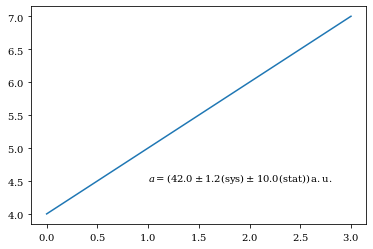

In [21]:
from numpy import arange
from matplotlib.pyplot import plot, text 

plot(arange(4),arange(4,8))
text(1,4.5,f'${format_result(42,[1.2,10],2,"a",False,"a.u.",dnames=["sys","stat"])}$');

## Opsummering

Vi har set oven over at vi skal afrunde vores resultater og usikkerheder, og præcisionen med hvilken vi giver vores resultater afhænger af den mindste usikkerhed som vi giver med én (undtagelsesvis 2) betydende cifre.  Vi skriver f.eks. 

## Summary

We have seen above that we must round our results and uncertainties, and the precision with which we give our results depends on the smallest uncertainty, which we give with one (exceptionally 2) significant digit. We write for example.

$$m_{\mathrm{H}} = \left(125.1 \pm 0.2 (\mathrm{stat}) \pm 0.1 (\mathrm{syst})\right)\,\mathrm{Ge\!V\!/c^2}\quad,$$

for Higgs massen.  Vi kan bruge funktionen `round_result` til at på en sikker måde at afrunde vores resultater og usikkerheder. 

for the Higgs mass. We can use the `round_result` function to safely round our results and uncertainties.

Nogle gange støder man på notationen 

Sometimes one encounters the notation

$$m_{\pi^0} = 134.9766(6)\,\mathrm{Ge\!V\!/c^2}\quad,$$

som skal forstås som 

to be understood as

$$ m_{\pi^0} = \left(134.9766 \pm 0.0006\right)\,\mathrm{Ge\!V\!/c^2}\quad,$$

hvor cifrene i parentesen altså udtrykker usikkerheden med en præcision svarende til det tilsvarende antal cifre af længst til højre i værdien. 

Nogen gange har vi bestemt _asymmetriske_ usikkerheder, og man er fristet til at skrive 

where the digits in the parenthesis thus express the uncertainty with a precision corresponding to the corresponding number of digits to the far right of the value.

Sometimes we have determined _asymmetric_ uncertainties, and one is tempted to write

$$x^{\delta_x^+}_{\delta_x^-}\quad,$$

hvor $\delta_x^+$ og $\delta_x^-$ er hendholdsvis den øvre og nedre grænse.  Man bør dog kun rapporterer resultater på denne form hvis man har _særlig_ goe grunde til det.  Har man ikke det, så bør man justerer sin værdi så at den er midt i usikkerhedsintervalet.  Det vil sige 

where $\delta_x^+$ and $\delta_x^-$ are the upper and lower limit, respectively. However, we should only report results in this form if you have _especially_ good reasons for doing so. If we do not, we will adjust the value so that it is in the middle of the uncertainty interval. Which means

\begin{align*}
  \delta_x^+, \delta_x^- &\rightarrow \delta_x = \frac{\delta_x^++\delta_x^-}{2}\\
  x &\rightarrow x' = (x-\delta_x^-) + \delta_x\quad,
\end{align*}

og skrive 

and write

$$ x'\pm\delta_x\quad.$$

In [22]:
n_significant.__doc__ = \
    """Determine the number of significant digits 
    
    >>> nbi_stat.n_significant("0.0120")
    >>> nbi_stat.n_significant(12340)
    
    Parameters
    ----------
      num_or_string : float or string 
        The number to determine number of significant digits for. 
        Note, to investigate numbers 
        
        - 0001234
        - 0.01230 
        
        one need to pass these a strings 
        
    Return
    ------
      Number of significant digits in num_or_string 

    See also
    --------
    round, round_round, format_result, print_result
    """


In [23]:
round.__doc__ = \
    """Round value(s) to the precision given by nbi_stat.py
    
    This function round the value(s) in v to the %precision 10^(-n) 
    by rounding to nearest even number, while only considering the most 
    adjecent digits. 
    
    Parameters:
        v : float, scalar or array like 
            Values to round 
        n : int, scalar or array like 
            Precision to round to i.e., number of digts, possibly 
            negative.  Note, this can be an array of the same size 
            as v
    Returns:
        u : float, scalar or array-like 
            Rounded values
    
    See also
    --------
    round_round, format_result, print_result, n_significant
    """


In [24]:
round_result.__doc__ =\
    """Round result and associated uncertainties
    
    The result value x and associated uncertainties deltas 
    are rounded to the same precision.  The precision is 
    set by the least exponent needed to represent all 
    uncertainties with at least nsign significant digits 
    
    Parameters
    ----------
    x : float 
        The result value 
    deltas : float, array_like
        List of uncertainties associated with x
    nsign : positive, int 
        Number of significant digits to round to
      
    Returns
    -------
    rx : float
        Rounded value 
    rdeltas : float, array_like 
        Rounded uncertainties 
    ndig : int, positive
        Number of digits to print value and uncertaineis with
        
    Examples
    --------
    
    >>> nbi_stat.round_result(12.345,[1.2345,0.1234,0.01234])
    (12.35, [1.23, 0.12, 0.01], 2)
    
    
    See also
    --------
    round, format_result, print_result, n_significant
    """

In [25]:
print_result.__doc__ =\
    """Print a single result with uncertainties, properly rounded 
    
    Parameters
    ----------
        x : float  
            Value of result 
        deltas : array-like 
            List of uncertainties 
        nsign : int, non-negative 
            Number of significant digits to round to 
        width : int, non-negative 
            Width of results 
            
    Examples
    --------
    
    >>> print_result(12.345,[1.2345,0.1234,0.01234])
       12.35 +/-     1.23 +/-     0.12 +/-     0.01
    

    
    See also
    --------
    round, round_result, format_result, n_significant
    """

In [26]:
format_result.__doc__ =\
    """Function to pretty-format results
    
    Parameters
    ----------
        value : float  
            Value of result 
        deltas : array-like 
            List of uncertainties 
        nsign : int, non-negative 
            Number of significant digits to round to 
        name : str, optional
            Value name (quantity)
        expo : bool, int, float, optional
            - if True, automatically add exponent 
            - if integer, add exponent to that power
            - if float, add exponent to nearest power 
            - if None, do not add exponent 
        unit : str, optional
            If given, the unit
        latex : bool
            If true, format as LaTeX
        dnames : str, array-like, optional
            If given, must be as large as delta and contains labels 
            for each uncertainty
            
    Returns
    -------
        s : str 
            Name, value, uncertainties, exponent, and unit formatted 
            
    Examples
    --------
    
    >>> format_result(42,1.2,1,'a',None,'a.u.')
    >>> format_result(42,[1.2,10],2,'a',None,'a.u.',latex=True)
    >>> format_result(42,[1.2,10],2,'a',True)
    >>> format_result(42,[1.2,10],2,'a',latex=False)
    >>> format_result(42,[1.2,10],2,'a',-1,latex=False)
    >>> format_result(42,nsig=1,expo=None)
    
    See also
    --------
    round, round_result, n_significant, print_result
    """